#FA8 - Cristobal

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Loading Dataset

In [2]:
df = pd.read_csv('PlantGrowth.csv')
df.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


#Checking Assumptions

##Assumption 1: Dependent Variable

'weight' is taken as the dependent variable.

#Assumption 2: Independent Variable

'group' is taken as the independent variable, with categories 'ctrl','trt1', and 'trt2'.

#Assumption 3: Independence of Observation

The values in the observations are independent of eachother.

#Assumption 4: Outliers

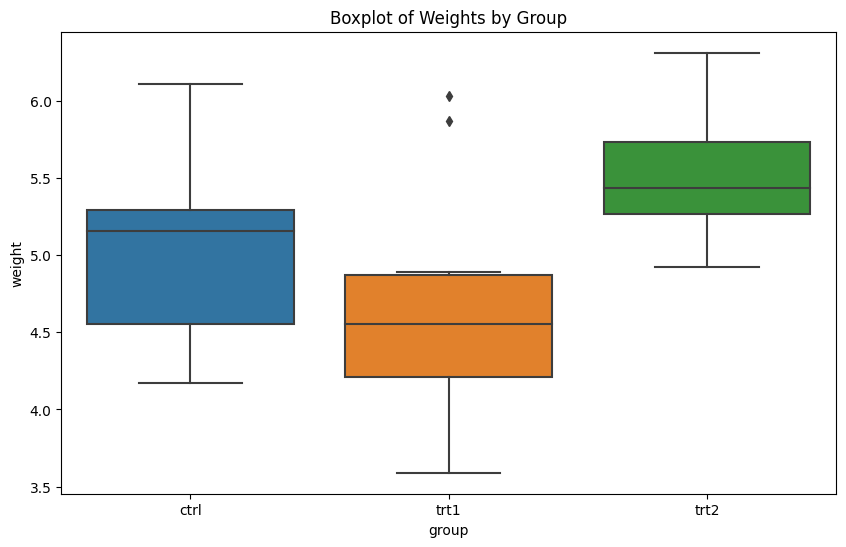

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='weight', data=df)
plt.title('Boxplot of Weights by Group')
plt.show()

There are no significant outliers that can affect the test.

#Assumption 5: Normality

In [7]:
print("Normality Test (Shapiro-Wilk) Results:")
for group in df['group'].unique():
    group_data = df[df['group'] == group]['weight']
    stat, p = shapiro(group_data)
    print(f"{group}: Statistics={stat}, p-value={p}")

Normality Test (Shapiro-Wilk) Results:
ctrl: Statistics=0.9566815495491028, p-value=0.7474744915962219
trt1: Statistics=0.9304108619689941, p-value=0.451945960521698
trt2: Statistics=0.941005289554596, p-value=0.5642533898353577


All p-values are greater than 0.05, suggesting that the weight distribution in each group does not significantly deviate from normality.

#Assumption 6: Homogeneity of Variances

In [8]:
print("\nHomogeneity of Variances (Levene's Test) Results:")
stat, p = levene(df[df['group'] == 'ctrl']['weight'],
                 df[df['group'] == 'trt1']['weight'],
                 df[df['group'] == 'trt2']['weight'])
print(f"Statistics={stat}, p-value={p}")


Homogeneity of Variances (Levene's Test) Results:
Statistics=1.1191856948703909, p-value=0.3412266241254737


The p-value is greater than 0.05, indicating that the assumption of homogeneity of variances is not violated.

#Computation

###ANOVA

In [11]:
anova_results = f_oneway(
    df[df['group'] == 'ctrl']['weight'],
    df[df['group'] == 'trt1']['weight'],
    df[df['group'] == 'trt2']['weight']
)

In [13]:
f_statistic = anova_results.statistic
p_value = anova_results.pvalue
print("\nANOVA Results:")
print(f"F-Statistic: {f_statistic}, P-Value: {p_value}")


ANOVA Results:
F-Statistic: 4.846087862380136, P-Value: 0.0159099583256229


In [14]:
desc_stats = df.groupby('group')['weight'].describe()
print("\nDescriptive Statistics by Group:")
print(desc_stats)


Descriptive Statistics by Group:
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


The ANOVA results suggest that there is a statistically significant difference between the means of at least two groups since the p-value is less than 0.05.

###Post-hoc: Tukey's HSD

In [15]:
tukey = pairwise_tukeyhsd(endog=df['weight'], groups=df['group'], alpha=0.05)
tukey_results = pd.DataFrame(
    data=tukey._results_table.data[1:],
    columns=tukey._results_table.data[0]
)

In [16]:
print("\nTukey's HSD Test Results:")
print(tukey_results)


Tukey's HSD Test Results:
  group1 group2  meandiff   p-adj   lower   upper  reject
0   ctrl   trt1    -0.371  0.3909 -1.0622  0.3202   False
1   ctrl   trt2     0.494  0.1980 -0.1972  1.1852   False
2   trt1   trt2     0.865  0.0120  0.1738  1.5562    True


There is a statistically significant difference between the mean weights of trt1 and trt2 groups.